# 1. Loading Necessary Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification 
from sklearn import metrics

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# 2. Loading the Dataset and Splitting into Training and Testing

In [14]:
marketting = pd.read_csv('bank_term.csv')


X = marketting.drop(columns=['y'])  # Features
y = marketting['y']  # Target variable

# 3. Data Pre-processing on Training Dataset

### 3.1 Categorical Feature Encoding

In [15]:
# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
X = pd.get_dummies(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

print(X.shape)
print(y.shape)

(45211, 51)
(45211,)


# 5a. Feature Scalling (Standardization)

In [16]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()

# Transform training data
X = scaler.fit_transform(X)

# Transform testing data
X = scaler.transform(X)


C:\Users\orias\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 5b. Dimensionality Reduction

Cumulative percentage of variance explained by each component:
Components 1 to 1: 16.88%
Components 1 to 2: 29.51%
Components 1 to 3: 38.51%
Components 1 to 4: 46.16%
Components 1 to 5: 52.57%
Components 1 to 6: 57.65%
Components 1 to 7: 61.60%
Components 1 to 8: 64.69%
Components 1 to 9: 67.64%
Components 1 to 10: 70.32%
Components 1 to 11: 72.87%
Components 1 to 12: 75.28%
Components 1 to 13: 77.64%
Components 1 to 14: 79.84%
Components 1 to 15: 81.79%
Components 1 to 16: 83.58%
Components 1 to 17: 85.09%
Components 1 to 18: 86.55%
Components 1 to 19: 87.91%
Components 1 to 20: 89.20%
Components 1 to 21: 90.42%


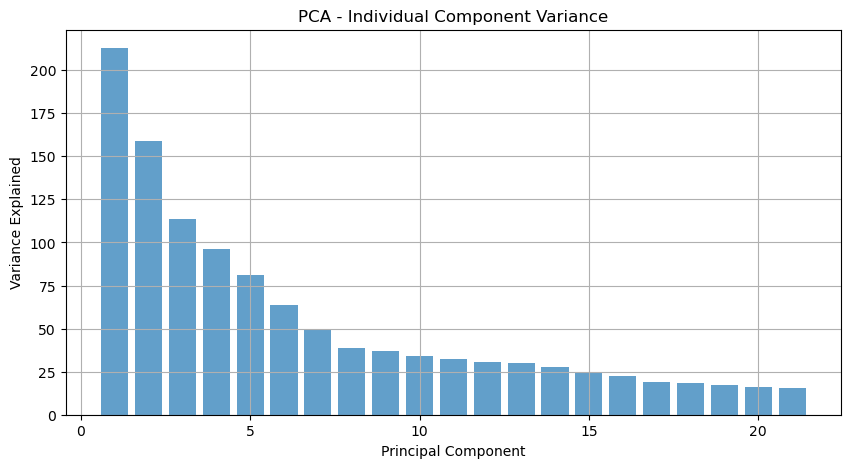

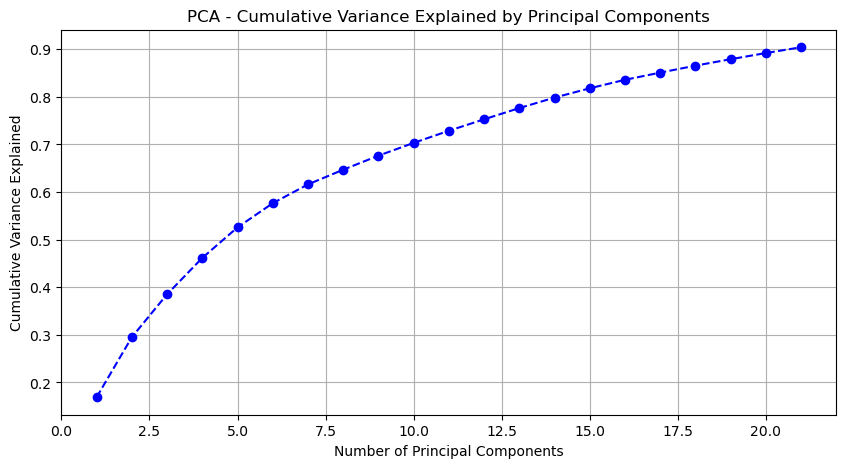

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)

# Individual component variance
individual_variance = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative percentage of variance explained by each component
print("Cumulative percentage of variance explained by each component:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio):
    print(f"Components 1 to {i + 1}: {cumulative_variance * 100:.2f}%")

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Individual Component Variance')
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

#checking the shape of the different test and train parameters
print('Original Data shape', X.shape)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

Original Data shape (45211, 51)
The shape of X_train is: (31647, 21)
The shape of X_test is: (13564, 21)
The shape of y_train is: (31647,)
The shape of y_test is: (13564,)


# 6. Machine Learning Algorithm

### 6.1 K-Nearest Neigbhor

Training Accuracy =  ['1.00', '0.92', '0.92', '0.91', '0.91', '0.90', '0.90', '0.90', '0.90', '0.90']
Test Accuracy =  ['0.84', '0.88', '0.87', '0.89', '0.88', '0.89', '0.89', '0.89', '0.89', '0.89']


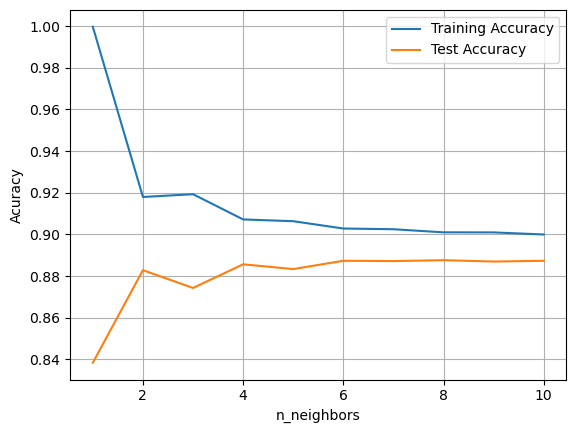

In [27]:
from sklearn.neighbors import KNeighborsClassifier
   
training_accuracy = []
test_accuracy = []
# try n_neigbhors from 1 to 10

neighbors_settings = range(1,11)
for n in neighbors_settings:
    
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    #record the training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    
    #record the generalisation accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
    predicted = knn.predict(X_test)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Neighbors')
#     plt.show()
#     print('=================================================')

plt.plot(neighbors_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()

print('Training Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in training_accuracy] )
print('Test Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in test_accuracy] )
    

### 6.2 Decision Tree

Training Accuracy =  ['0.88', '0.89', '0.89', '0.90', '0.90', '0.90', '0.90', '0.91', '0.91', '0.91']
Test Accuracy =  ['0.88', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.88']


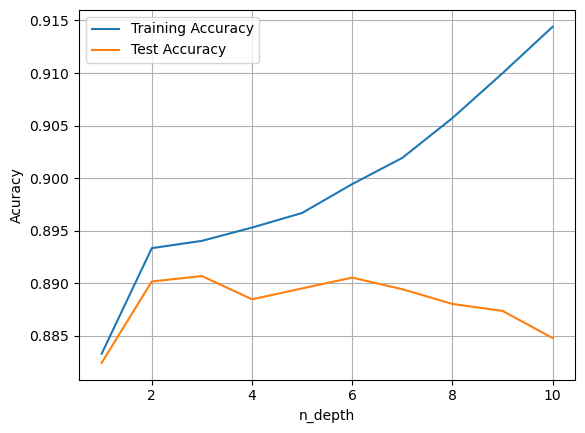

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 10

depth_settings = range(1,11)
for n in depth_settings:
    #building the model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    tree.fit(X_train, y_train)
    #record the training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    #record the generalisation accuracy
    test_accuracy.append(tree.score(X_test, y_test))
    
    predicted = tree.predict(X_test)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Depth')
#     plt.show()
#     print('=================================================')

plt.plot(depth_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(depth_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_depth')
plt.grid()
plt.legend()

print('Training Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in training_accuracy] )
print('Test Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in test_accuracy] )

### 6.3 Random Forest

Training Accuracy =  ['0.94', '0.94', '0.97', '0.96', '0.98']
Test Accuracy =  ['0.83', '0.87', '0.85', '0.87', '0.86']


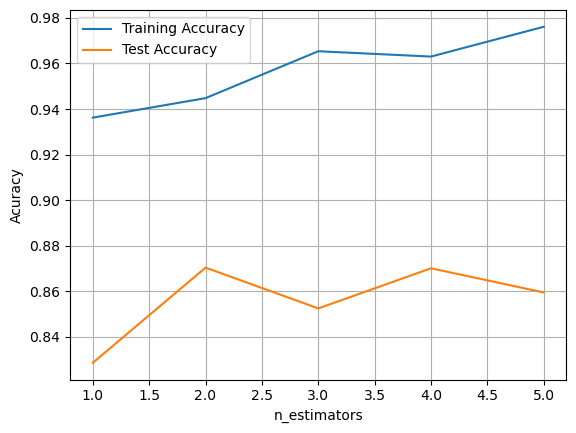

In [30]:
from sklearn.ensemble import RandomForestClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

estimators_settings = range(1,6)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    forest.fit(X_train, y_train)
    #record the training set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    #record the generalisation accuracy
    test_accuracy.append(forest.score(X_test, y_test))
    
#     predicted = forest.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Estimators')
#     plt.show()
#     print('=================================================')

plt.plot(estimators_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

print('Training Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in training_accuracy] )
print('Test Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in test_accuracy] )

### 6.4 Gradient Boosting

Training Accuracy =  ['0.89', '0.90', '0.90', '0.90', '0.91']
Test Accuracy =  ['0.89', '0.89', '0.89', '0.89', '0.89']


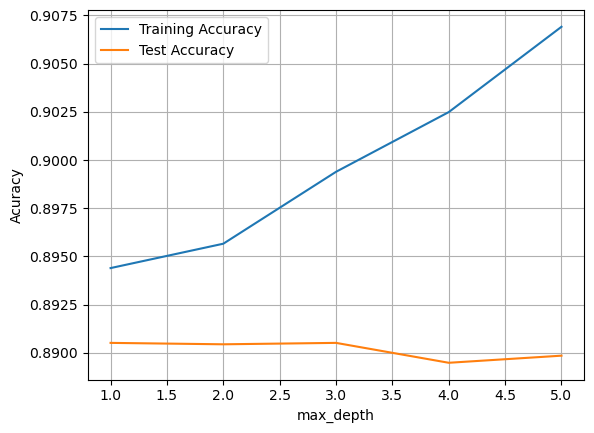

In [31]:
#Random Forest for SMOTE

from sklearn.ensemble import GradientBoostingClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

parameters_settings = range(1,6)
for n in estimators_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    gbrt.fit(X_train, y_train)
    #record the training set accuracy
    training_accuracy.append(gbrt.score(X_train, y_train))
    #record the generalisation accuracy
    test_accuracy.append(gbrt.score(X_test, y_test))
    
#     predicted = gbrt.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Max_depth')
#     plt.show()
#     print('=================================================')

plt.plot(parameters_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('max_depth')
plt.grid()
plt.legend()

print('Training Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in training_accuracy] )
print('Test Accuracy = ', ["{:.2f}".format(accuracy) for accuracy in test_accuracy] )

### 6.5 Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.001)
logreg.fit(X_train, y_train)
#record the training set accuracy
training_accuracy = logreg.score(X_train, y_train)
#record the generalisation accuracy
test_accuracy = logreg.score(X_test, y_test)
    
# predicted = logreg.predict(X_test_pca)
# # Calculate the confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# # Plot the confusion matrix
# plt.figure(figsize=(0.5, 0.5))  
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
# cm_display.plot()
# plt.title('Linear Regression with C=0.001')
# plt.show()
# print('=================================================')

print(training_accuracy)
print(test_accuracy)

0.892754447498973
0.8898554998525509


# METRICS

METRICS FOR KNN
Cross Validation 5 Fold:
Accuracy: 0.8826307182613593
Variation +/-: 0.005480287517619131

Metrics:
Accuracy: 0.8833677381303451
Precision: 0.5091678420310296
Specificity: 0.9709248892973515
Sensitivity/Recall: 0.2263322884012539
F1 Measure: 0.3133680555555556
G Measure: 0.3133680555555556
Mathews Corr Coef: 0.2854847631966648
Time taken: 1.0128095149993896


<Figure size 50x50 with 0 Axes>

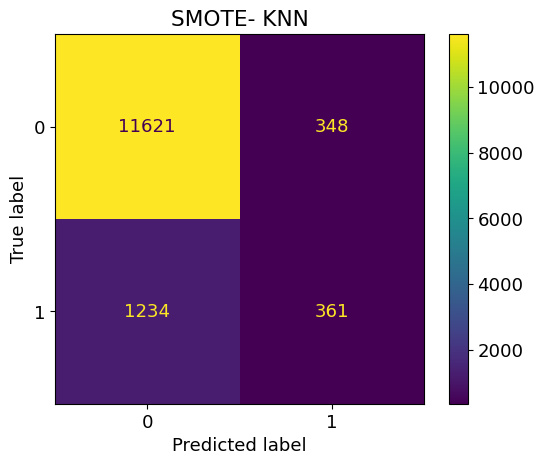

METRICS FOR DECISION TREE
Cross Validation 5 Fold:
Accuracy: 0.8837362062048021
Variation +/-: 0.0025459095115608725

Metrics:
Accuracy: 0.8894131524624005
Precision: 0.5987525987525988
Specificity: 0.9838750104436461
Sensitivity/Recall: 0.180564263322884
F1 Measure: 0.2774566473988439
G Measure: 0.2774566473988439
Mathews Corr Coef: 0.2864102908998354
Time taken: 0.704890251159668


<Figure size 50x50 with 0 Axes>

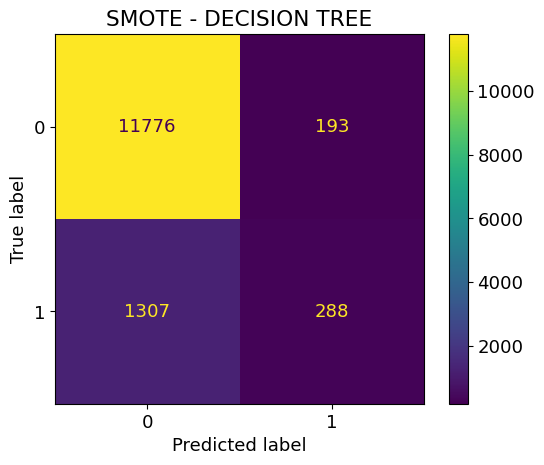

METRICS FOR RANDOM FOREST
Cross Validation 5 Fold:
Accuracy: 0.854909960454797
Variation +/-: 0.0017461677396944527

Metrics:
Accuracy: 0.8594072544971985
Precision: 0.3657487091222031
Specificity: 0.9384242626785864
Sensitivity/Recall: 0.2664576802507837
F1 Measure: 0.30830612985128764
G Measure: 0.30830612985128764
Mathews Corr Coef: 0.23581098567889058
Time taken: 1.8039143085479736


<Figure size 50x50 with 0 Axes>

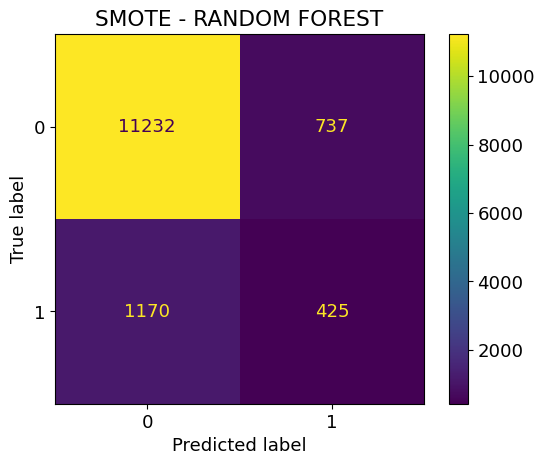

METRICS FOR GRADIENT BOOSTING
Cross Validation 5 Fold:
Accuracy: 0.8872015489715747
Variation +/-: 0.0025264266114859877

Metrics:
Accuracy: 0.8894868770274256
Precision: 0.5948616600790514
Specificity: 0.9828724204194168
Sensitivity/Recall: 0.18871473354231974
F1 Measure: 0.2865302237029986
G Measure: 0.2865302237029986
Mathews Corr Coef: 0.2916624082852255
Time taken: 65.48890614509583


<Figure size 50x50 with 0 Axes>

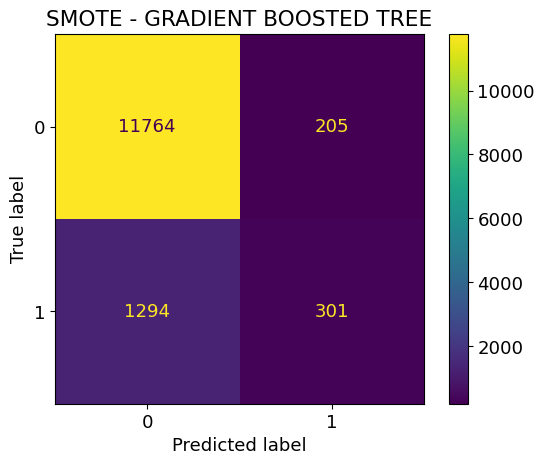

METRICS FOR LOGISTIC REGRESSION
Cross Validation 5 Fold:
Accuracy: 0.8895606698655115
Variation +/-: 0.0017338899683198806

Metrics:
Accuracy: 0.8898554998525509
Precision: 0.6100217864923747
Specificity: 0.9850446988052469
Sensitivity/Recall: 0.1755485893416928
F1 Measure: 0.2726387536514119
G Measure: 0.2726387536514119
Mathews Corr Coef: 0.28609601733265316
Time taken: 0.14907479286193848


<Figure size 50x50 with 0 Axes>

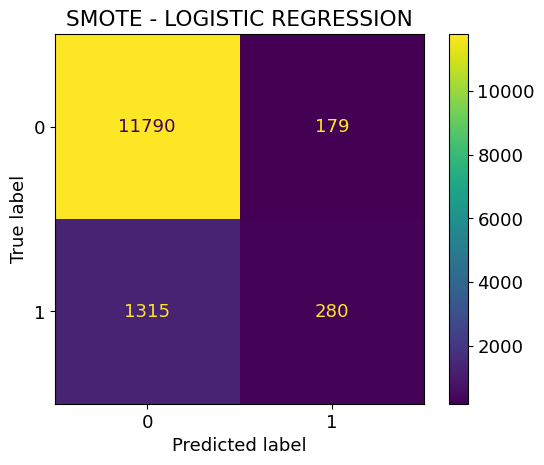

In [34]:
# METRICS

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import time

# Function to compute metrics
def compute_metrics(model, X, y):
    # Cross-validation 5 folds
    start_time = time.time()
    cv_scores = cross_val_score(model, X, y, cv=5)
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Accuracy and Variation
    accuracy = cv_scores.mean()
    variation = cv_scores.std()
    
    # Metrics
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    specificity = (y_pred[y == 0] == 0).sum() / (y == 0).sum()
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    
    # Print results
    print("Cross Validation 5 Fold:")
    print("Accuracy:", accuracy)
    print("Variation +/-:", variation)
    print("\nMetrics:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision)
    print("Specificity:", specificity)
    print("Sensitivity/Recall:", recall)
    print("F1 Measure:", f1)
    print("G Measure:", 2 * (precision * recall) / (precision + recall))
    print("Mathews Corr Coef:", mcc)
    print("Time taken:", time_taken)

plt.rcParams.update({'font.size': 13})
print('METRICS FOR KNN')
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
compute_metrics(knn, X_test, y_test)

predicted = knn.predict(X_test)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE- KNN')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR DECISION TREE')
tree = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, y_train)
compute_metrics(tree, X_test, y_test)

predicted = tree.predict(X_test)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - DECISION TREE')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR RANDOM FOREST')
forest = RandomForestClassifier(n_estimators=5, max_features='sqrt', random_state=3).fit(X_train, y_train)
compute_metrics(forest, X_test, y_test)

predicted = forest.predict(X_test)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - RANDOM FOREST')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR GRADIENT BOOSTING')
gbrt = GradientBoostingClassifier(max_depth=4, random_state=2).fit(X_train, y_train)
compute_metrics(gbrt, X_test, y_test)

predicted = gbrt.predict(X_test)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - GRADIENT BOOSTED TREE')
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR LOGISTIC REGRESSION')
logreg = LogisticRegression(C=0.001).fit(X_train, y_train)
compute_metrics(logreg, X_test, y_test)

predicted = logreg.predict(X_test)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('SMOTE - LOGISTIC REGRESSION')
plt.show()

print('=============================================')
print('=============================================')


# ROC CURVES FOR ALL ALGORITHMS

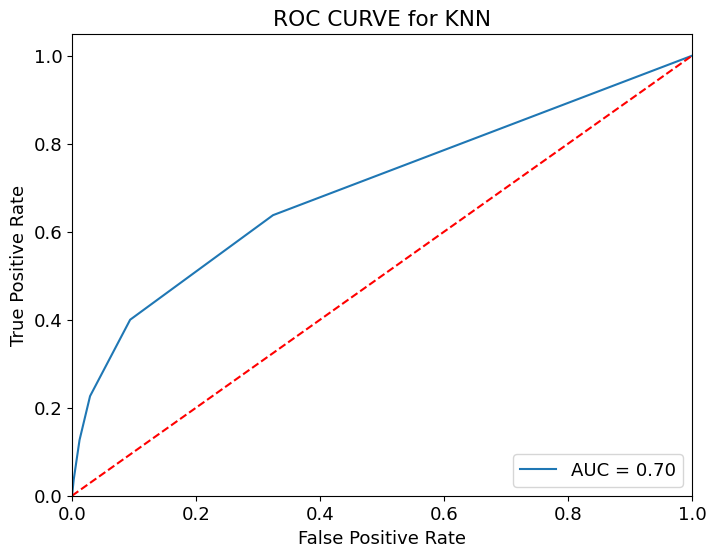

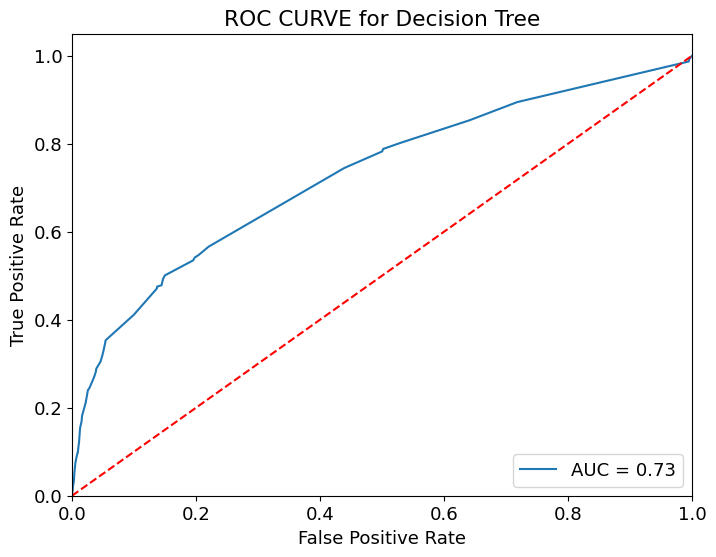

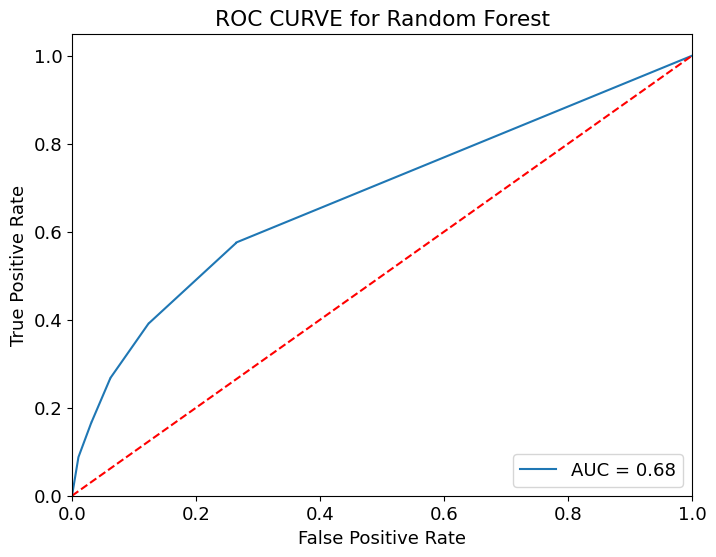

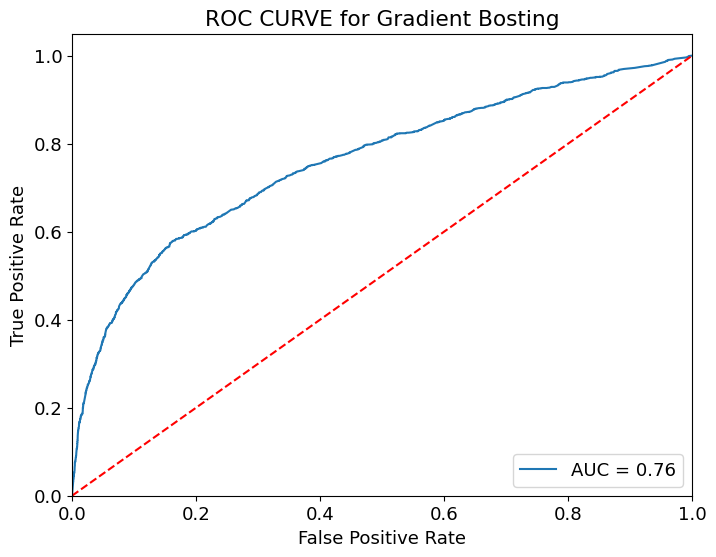

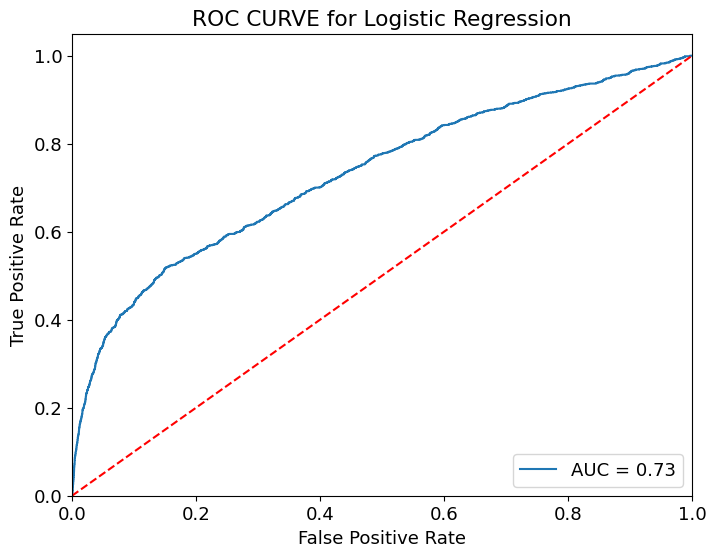

In [36]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test sets
def roc_plot(model, name):
    probs = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)


    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC CURVE for {name}')
    plt.legend(loc='lower right')
    plt.show()


roc_plot(knn, 'KNN')
roc_plot(tree, 'Decision Tree')
roc_plot(forest, 'Random Forest')
roc_plot(gbrt, 'Gradient Bosting')
roc_plot(logreg, 'Logistic Regression')

